In [159]:
#pip install scikit-learn
import numpy as np
from numpy.random import randn
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def linearSCM(epsilon_x1, epsilon_x2, epsilon_x3, epsilon_x4, x1_do=None):
    x2 = epsilon_x2
    if x1_do is not None:
        x1 = x1_do
    else:
        x1 = 3 * x2 + epsilon_x1
    x3 = 5 * x1 + 4 * x2 + epsilon_x3
    x4 = 6 * x3 + epsilon_x4
    # if type((x2) > float:
    #     df = pd.DataFrame({"V1": x1, "V2": x2, "V3": x3, "V4": x4})
    # else:
    df = pd.DataFrame({"V1": [x1], "V2": [x2], "V3": [x3], "V4": [x4]})
    return df

def linearSCM_obs(epsilon_x1, epsilon_x2, epsilon_x3, epsilon_x4):
    x2 = epsilon_x2
    x1 = 3 * x2 + epsilon_x1
    x3 = 5 * x1 + 4 * x2 + epsilon_x3
    x4 = 6 * x3 + epsilon_x4
    df = pd.DataFrame({"V1": x1, "V2": x2, "V3": x3, "V4": x4})
    return df

def linearSCM_obs2(epsilon_x1, epsilon_x2, epsilon_x3, epsilon_x4,x2_obs=None):
    if x2_obs is not None:
        x2 = x2_obs
        x1 = 3 * x2 + epsilon_x1
        x3 = 5 * x1 + 4 * x2 + epsilon_x3
        x4 = 6 * x3 + epsilon_x4
        df = pd.DataFrame({"V1": x1, "V2": x2, "V3": x3, "V4": x4})
        return df

# confounding

In [80]:
n_randn=100
epsilon_x1 = randn(n_randn)
epsilon_x2 = randn(n_randn)
epsilon_x3 = randn(n_randn)
epsilon_x4 = randn(n_randn)
df_sim=linearSCM_obs(epsilon_x1, epsilon_x2, epsilon_x3, epsilon_x4)

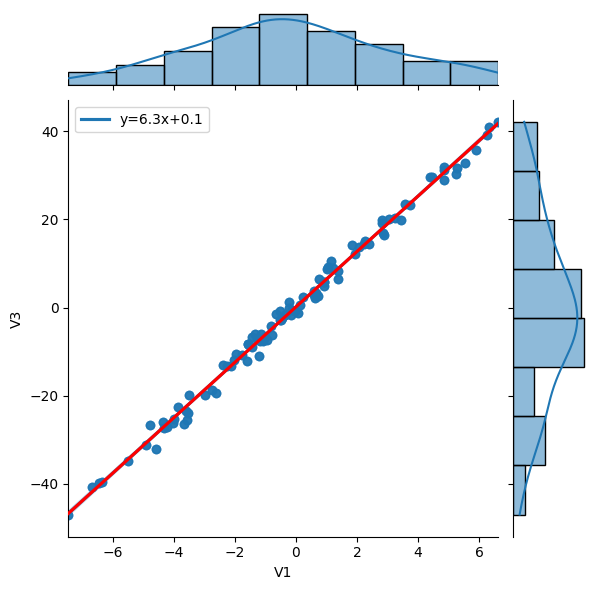

In [87]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sim['V1'],df_sim['V3'])
# the confounding case P(x3|x1)
g = sns.jointplot(data = df_sim, x="V1", y="V3", kind="reg")
g1 = sns.regplot(data = df_sim, x="V1", y="V3", ax=g.ax_joint, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
regline = g1.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
g1.legend()
plt.savefig("confounding_0.png")

In [76]:
n_randn=100
epsilon_x1 = randn(n_randn)
epsilon_x2 = randn(n_randn)
epsilon_x3 = randn(n_randn)
epsilon_x4 = randn(n_randn)
df1=linearSCM_obs2(epsilon_x1, epsilon_x2, epsilon_x3, epsilon_x4, x2_obs=1)
df2=linearSCM_obs2(epsilon_x1, epsilon_x2, epsilon_x3, epsilon_x4, x2_obs=2)
df12 = pd.concat([df1,df2])

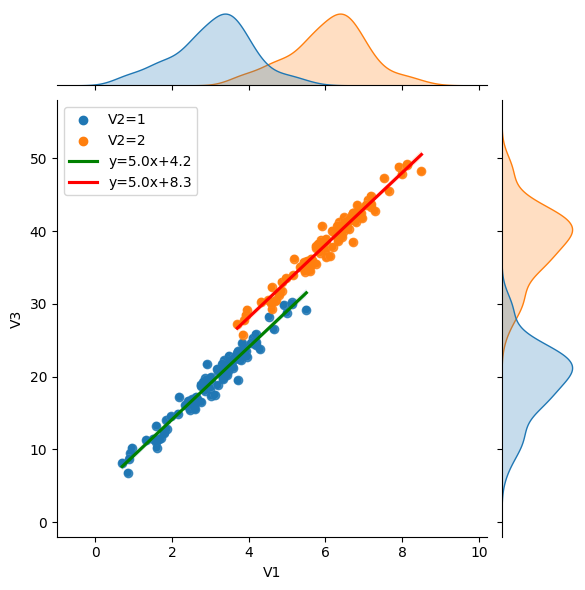

In [91]:
# the confounding case with additional condition on x2 P(x3|X1,X2)
palette ={'V2=1': "C0", 'V2=2': 'C1'}
slope1, intercept1, r_value, p_value, std_err = stats.linregress(df1['V1'],df1['V3'])
slope2, intercept2, r_value, p_value, std_err = stats.linregress(df2['V1'],df2['V3'])
df12.iloc[:100, 1] ='V2=1'
df12.iloc[100:, 1] ='V2=2'
g = sns.jointplot(data = df12, x="V1", y="V3", hue='V2', palette=palette)
g1 = sns.regplot(data = df12[:100], x="V1", y="V3", ax=g.ax_joint, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)})
g2 = sns.regplot(data = df12[100:], x="V1", y="V3", ax=g.ax_joint, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)})
regline1 = g1.get_lines()[0]
regline1.set_color('green')
g1.legend()

regline2 = g2.get_lines()[1]
regline2.set_color('red')
g2.legend()
plt.savefig("confounding_1.png")

## Intervention

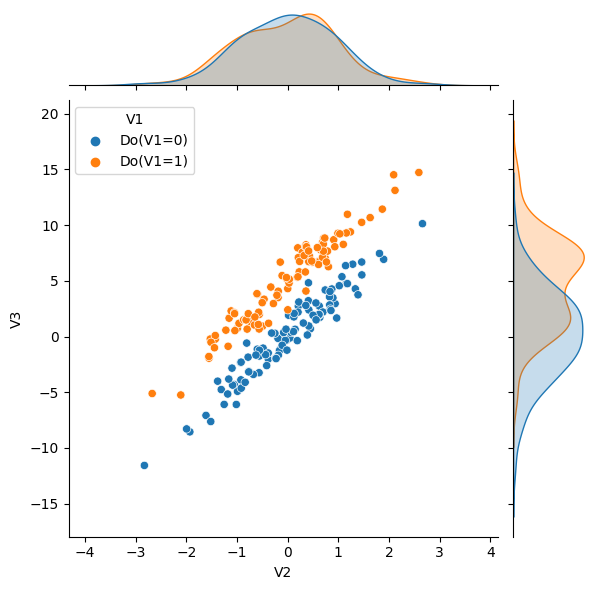

In [149]:
epsilon_x1 = randn(100)
epsilon_x2 = randn(100)
epsilon_x3 = randn(100)
epsilon_x4 = randn(100)

df0_2 = linearSCM(epsilon_x1, epsilon_x2 , epsilon_x3, epsilon_x4, 0)

epsilon_x1 = randn(100)
epsilon_x2 = randn(100)
epsilon_x3 = randn(100)
epsilon_x4 = randn(100)

df1_2 = linearSCM(epsilon_x2, epsilon_x2, epsilon_x3, epsilon_x4, 1)
df01_2 = pd.concat([df0_2, df1_2])
df01_2.iloc[:100, 0] ='Do(V1=0)'
df01_2.iloc[100:, 0] ='Do(V1=1)'
sns_plot = sns.jointplot(data = df01_2, x="V2", y="V3", hue="V1")
plt.savefig("linear_intervention.png")

In [118]:
# observational data as comparision
n_randn=1000000
epsilon_x1 = randn(n_randn)
epsilon_x2 = randn(n_randn)
epsilon_x3 = randn(n_randn)
epsilon_x4 = randn(n_randn)
df_obs = linearSCM_obs(epsilon_x1, epsilon_x2, epsilon_x3, epsilon_x4)

a = df_obs['V1']>=(0.-0.001)
b = df_obs['V1']<=(0.+0.001)
df_obs_0 =df_obs[a & b]

a = df_obs['V1']>=(1.-0.001)
b = df_obs['V1']<=(1.+0.001)
df_obs_1 =df_obs[a & b]
df_obs_12 = pd.concat([df_obs_0[:100], df_obs_1[:100]])

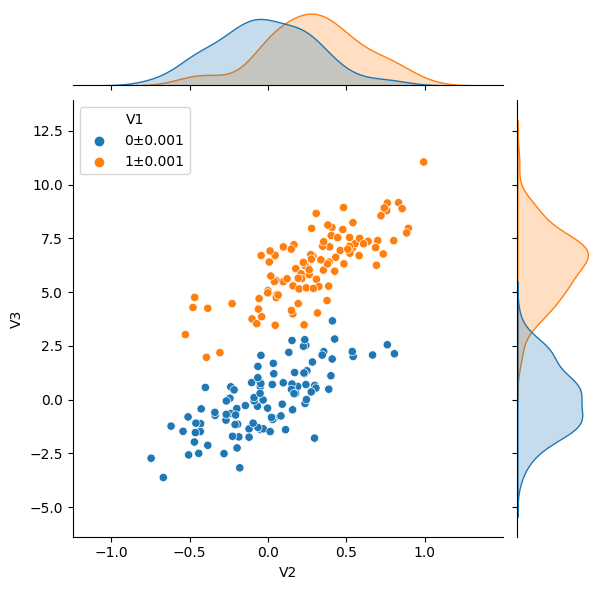

In [129]:
df_obs_12 .iloc[:100, 0] ='0±0.001'
df_obs_12 .iloc[100:, 0] ='1±0.001'
sns_plot = sns.jointplot(data = df_obs_12, x="V2", y="V3", hue="V1")
# sns_plot.set(xlim=(-4, 4), ylim=(-20, 20))
plt.savefig("linear_observation.png")

## counterfactual

c:\users\shiqi\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\shiqi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\users\shiqi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


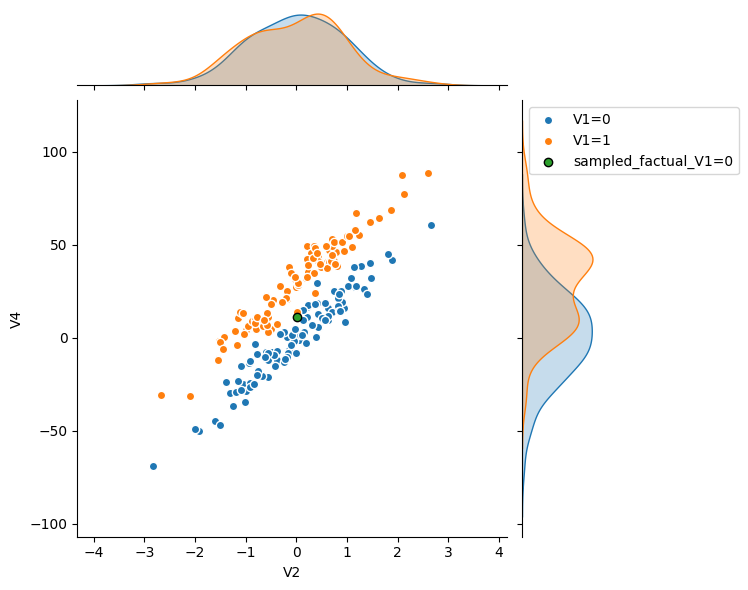

In [163]:
g = sns.JointGrid("V2", "V4", df01_2)
handles=[]
for x1, x1_others in df01_2.groupby("V1"):
    sns.kdeplot(x1_others["V2"], ax=g.ax_marg_x, fill=True)
    sns.kdeplot(x1_others["V4"], ax=g.ax_marg_y, vertical=True, fill=True)
    x =g.ax_joint.scatter(x = x1_others["V2"], y = x1_others["V4"], marker = "o",  edgecolors='white')
    handles.append(x)
    # plt.legend(loc = 'upper right')
x1_sample = g.ax_joint.scatter(x = df01_2["V2"][:1], y = df01_2["V4"][:1], marker = "o",  edgecolors='black')
handles.append(x1_sample)
plt.legend(handles = handles,
           labels  = ['V1=0','V1=1','sampled_factual_V1=0'], loc = 'upper left')
plt.savefig("sampled_factual_V1=0")

In [165]:
# import pandas as pd
# dic_df = {'x1':[1.0], 'x2':[1.002408], 'x3':[1.19545], 'x4':[7.272524]}
# df01 = pd.DataFrame.from_dict(dic_df)
df01_2.iloc[:100, 0] = 0
df01_2.iloc[100:, 0] = 1


df01 = df01_2[:1]
df01



,V1,V2,V3,V4
0,0,0.018082,1.913472,11.200485


In [166]:
df01["epsilon_V1"] = df01["V1"] - 3 * df01["V2"]
df01["epsilon_V2"] = df01["V2"]
df01["epsilon_V3"] = df01["V3"] - [5] * df01["V1"] - [4] * df01["V2"]
df01["epsilon_V4"] = df01["V4"] - [6] * df01["V3"]

df01

C:\Users\shiqi\AppData\Local\Temp\ipykernel_1544\3623553113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df01["epsilon_V1"] = df01["V1"] - 3 * df01["V2"]
C:\Users\shiqi\AppData\Local\Temp\ipykernel_1544\3623553113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df01["epsilon_V2"] = df01["V2"]
C:\Users\shiqi\AppData\Local\Temp\ipykernel_1544\3623553113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,V1,V2,V3,V4,epsilon_V1,epsilon_V2,epsilon_V3,epsilon_V4
0,0,0.018082,1.913472,11.200485,-0.054245,0.018082,1.841145,-0.280347


In [167]:
counterfactual_patients = pd.DataFrame()

x1c = []
x2c = []
x3c = []
x4c = []

for itern, patient in df01.iterrows():

    if patient["V1"] == 0:
        counterfactual_x1 = 1
    if patient["V1"] == 1:
        counterfactual_x1 = 0

    counterfactual_patient = linearSCM(counterfactual_x1, patient["epsilon_V2"], patient["epsilon_V3"], patient["epsilon_V4"], counterfactual_x1)
    counterfactual_patients = pd.concat([counterfactual_patients,counterfactual_patient])

#     print(counterfactual_patients)

    x1c.append(counterfactual_x1)
    x2c.append(counterfactual_patient["V2"][0])
    x3c.append(counterfactual_patient["V3"][0])
    x4c.append(counterfactual_patient["V4"][0])

df01["V1c"] = x1c
df01["V2c"] = x2c
df01["V3c"] = x3c
df01["V4c"] = x4c
# counterfactual_patients["x1"]

# df01["x1c"] = counterfactual_patients["x1"]
# df01["x2c"] = counterfactual_patients["x2"]
# df01["x3c"] = counterfactual_patients["x3"]
# df01["x4c"] = counterfactual_patients["x4"]

counterfactual_patients
# We use this just to plot things in an easier way
df01["is_factual"]=True
counterfactual_patients["is_factual"]=False

# We create this just to plot things in an easier way
df_all = pd.concat([counterfactual_patients,df01])
df01

C:\Users\shiqi\AppData\Local\Temp\ipykernel_1544\4228616961.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df01["V1c"] = x1c
C:\Users\shiqi\AppData\Local\Temp\ipykernel_1544\4228616961.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df01["V2c"] = x2c
C:\Users\shiqi\AppData\Local\Temp\ipykernel_1544\4228616961.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,V1,V2,V3,V4,epsilon_V1,epsilon_V2,epsilon_V3,epsilon_V4,V1c,V2c,V3c,V4c,is_factual
0,0,0.018082,1.913472,11.200485,-0.054245,0.018082,1.841145,-0.280347,1,0.018082,6.913472,41.200485,True


In [168]:
df02 = df01.copy()
df02["is_factual"] =False
df02["V1"] = df02["V1c"]
df02["V2"] = df02["V2c"]
df02["V3"] = df02["V3c"]
df02["V4"] = df02["V4c"]
df_test = pd.concat([df02, df01])

c:\users\shiqi\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\shiqi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\users\shiqi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


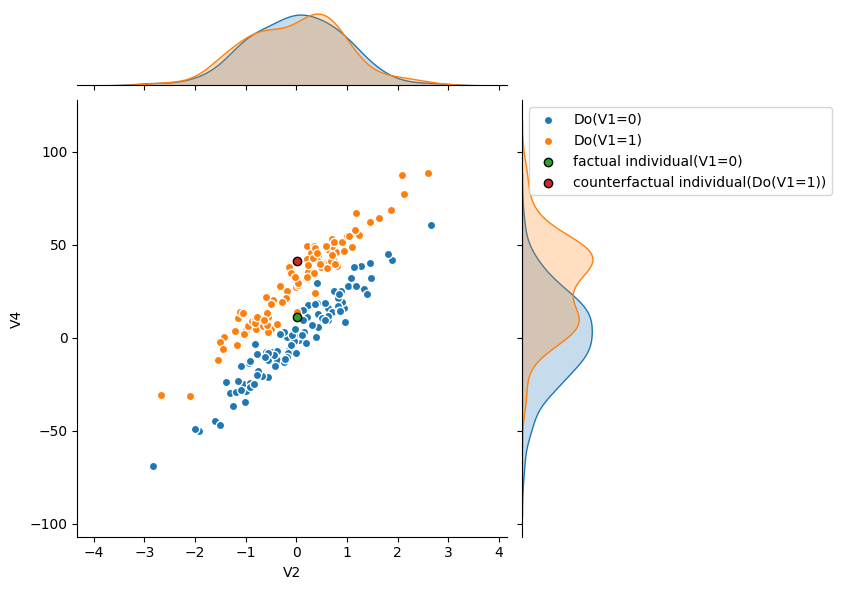

In [172]:
g = sns.JointGrid("V2", "V4", df01_2)
handles=[]
for x1, x1_others in df01_2.groupby("V1"):
    sns.kdeplot(x1_others["V2"], ax=g.ax_marg_x, fill=True)
    sns.kdeplot(x1_others["V4"], ax=g.ax_marg_y, vertical=True, fill=True)
    x =g.ax_joint.scatter(x = x1_others["V2"], y = x1_others["V4"], marker = "o",  edgecolors='white')
    handles.append(x)
    # plt.legend(loc = 'upper right')
x1_sample = g.ax_joint.scatter(x = df01_2["V2"][:1], y = df01_2["V4"][:1], marker = "o",  edgecolors='black')
x1_counterfact = g.ax_joint.scatter(x = df_test["V2"][:1], y = df_test["V4"][:1], marker = "o",  edgecolors='black')
handles.append(x1_sample)
handles.append(x1_counterfact)
plt.legend(handles = handles,
           labels  = ['Do(V1=0)','Do(V1=1)','factual individual(V1=0)', 'counterfactual individual(Do(V1=1))'], loc = 'upper left')
plt.savefig("sampled_counterfactual_V1=0", bbox_inches='tight')